In [1]:
# !pip install yellowbrick

In [2]:
################################
### Import packages and Data ###
################################
from nlp_preprocessing import df_preprocess

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import os

in_dir = '../data'
out_dir = ''

# df_train = pd.read_csv(os.path.join(in_dir, "sentiment_train.csv"))

from gensim import corpora
from parameters import *

from utils import read_data

import spacy
nlp = spacy.load('en_core_web_md')

import warnings
warnings.filterwarnings('ignore')

In [3]:
TEXT_COL = "Please tell us why you were dissatisfied with today's experience. Please be as specific as possible."
RENAMED_TEXT_COL = "dissatisfaction_reason"

#read dataset, only keep desired text column and rename it
data = read_data(in_dir = in_dir, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)


In [4]:
# x_train , y_train = df_preprocess(data, text_col= RENAMED_TEXT_COL, nlp_method = 'pre_trained_glove',
#                                           target = None, feat_eng = False, nlp = nlp)
# x_train.shape

# x_train.to_csv('glove_vector_dissat.csv')

In [26]:
x_train = pd.read_csv('glove_vector_dissat.csv')
x_train = x_train.iloc[:,1:]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.067927,0.156639,-0.234007,0.012331,-0.052468,0.191705,-0.096075,-0.223780,-0.008320,1.318271,...,-0.172211,0.032621,0.195282,0.137479,0.175327,-0.210195,-0.165515,-0.062782,0.255425,0.130909
1,-0.272184,0.114966,-0.027971,-0.152312,-0.301262,0.056219,0.206092,-0.112336,0.212380,2.352400,...,0.021943,0.100452,0.108514,0.107404,0.202352,0.122283,-0.098560,0.013226,0.061522,-0.227862
2,-0.073543,0.006959,-0.254470,-0.158120,-0.097978,0.147733,0.102742,-0.315038,0.045056,2.025146,...,-0.341700,-0.043862,-0.085016,0.055202,0.160419,0.017044,-0.114809,-0.143645,0.060566,0.266621
3,0.137997,0.187236,-0.213740,0.041019,0.136378,0.076126,-0.021509,-0.385177,0.166500,1.703660,...,-0.106261,0.040680,-0.077395,-0.103159,0.207210,-0.260388,-0.221395,-0.038195,0.002629,0.224916
4,-0.076179,0.034250,-0.085417,0.124419,0.211297,-0.131511,0.150662,-0.295047,-0.002381,2.269926,...,-0.212461,0.094510,-0.050821,0.063690,0.240338,0.043936,0.004132,-0.097026,-0.001103,0.036340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,0.150910,0.062768,-0.393091,0.004817,0.371491,-0.049915,0.022276,-0.155995,-0.033867,2.282375,...,-0.264884,-0.008170,-0.070613,-0.272230,0.130295,-0.113270,-0.217929,-0.258895,0.214760,0.129972
4165,0.012870,-0.028707,-0.367977,0.270394,-0.085159,-0.004277,0.128539,-0.185932,0.145480,2.101400,...,-0.263677,-0.015867,-0.028023,0.001087,0.253843,-0.073163,-0.094954,-0.048526,0.205302,0.025883
4166,0.075201,0.047592,-0.356158,0.022908,-0.124359,0.133522,0.048729,-0.368830,-0.049641,1.608440,...,-0.331953,-0.069270,0.116558,0.041594,0.081362,-0.017125,0.162181,-0.027963,-0.014817,-0.005204
4167,-0.014123,0.118818,-0.215065,-0.080056,-0.086152,0.063270,0.106491,-0.170430,0.011160,2.332000,...,-0.165209,0.000258,-0.031345,-0.103796,0.294469,-0.036944,-0.164072,-0.291900,0.106440,0.012411


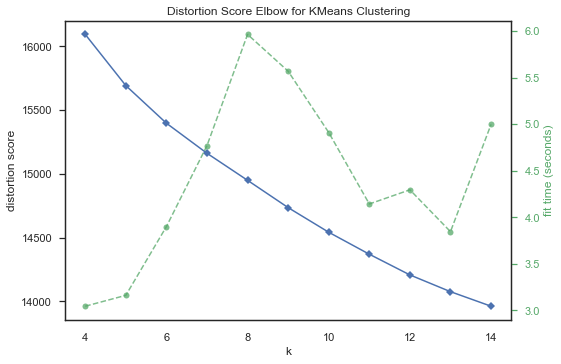

In [27]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(x_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

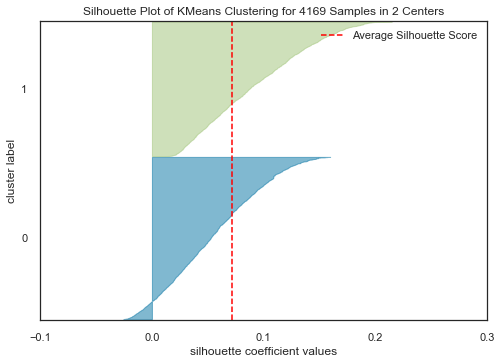

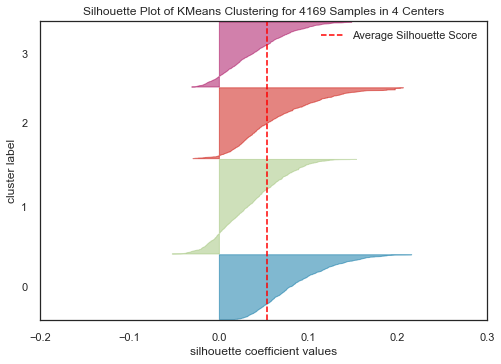

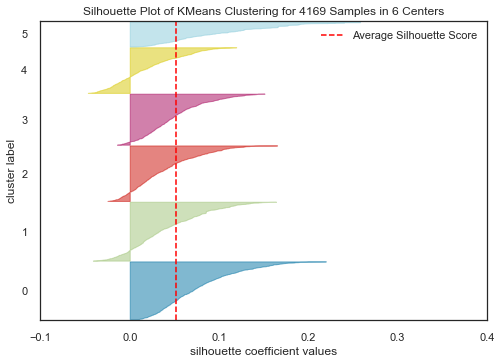

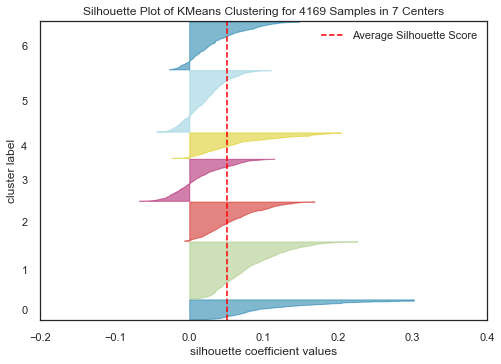

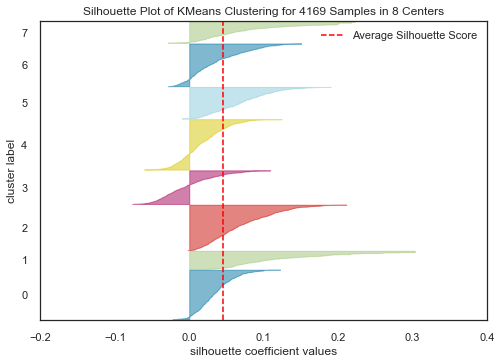

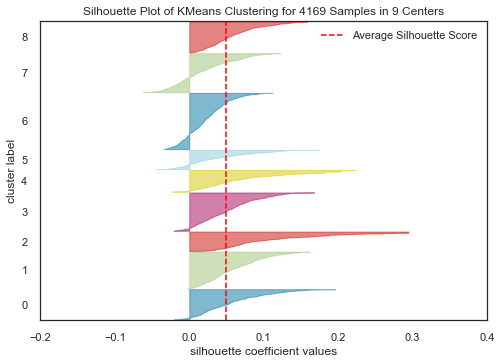

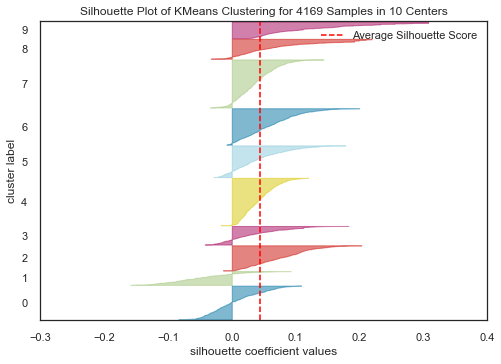

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
for k in [2,4,6, 7,8, 9, 10]:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(x_train)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

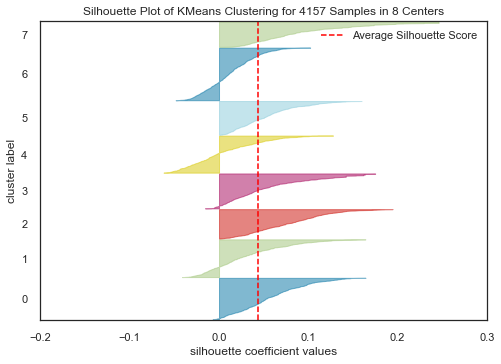

In [81]:
from sklearn import preprocessing  # to normalise existing X
X_Norm = preprocessing.normalize(x_train)


model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_Norm)        # Fit the data to the visualizer
visualizer.show()  


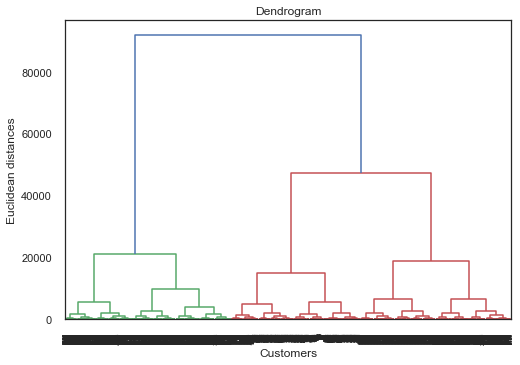

In [11]:
# Using the dendrogram to find the optimal number of clusters
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
sns.set(style = "white")
dendrogram = sch.dendrogram(sch.linkage(x_train, method = 'ward' , metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [82]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.067927,0.156639,-0.234007,0.012331,-0.052468,0.191705,-0.096075,-0.223780,-0.008320,1.318271,...,-0.172211,0.032621,0.195282,0.137479,0.175327,-0.210195,-0.165515,-0.062782,0.255425,0.130909
1,-0.272184,0.114966,-0.027971,-0.152312,-0.301262,0.056219,0.206092,-0.112336,0.212380,2.352400,...,0.021943,0.100452,0.108514,0.107404,0.202352,0.122283,-0.098560,0.013226,0.061522,-0.227862
2,-0.073543,0.006959,-0.254470,-0.158120,-0.097978,0.147733,0.102742,-0.315038,0.045056,2.025146,...,-0.341700,-0.043862,-0.085016,0.055202,0.160419,0.017044,-0.114809,-0.143645,0.060566,0.266621
3,0.137997,0.187236,-0.213740,0.041019,0.136378,0.076126,-0.021509,-0.385177,0.166500,1.703660,...,-0.106261,0.040680,-0.077395,-0.103159,0.207210,-0.260388,-0.221395,-0.038195,0.002629,0.224916
4,-0.076179,0.034250,-0.085417,0.124419,0.211297,-0.131511,0.150662,-0.295047,-0.002381,2.269926,...,-0.212461,0.094510,-0.050821,0.063690,0.240338,0.043936,0.004132,-0.097026,-0.001103,0.036340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,0.150910,0.062768,-0.393091,0.004817,0.371491,-0.049915,0.022276,-0.155995,-0.033867,2.282375,...,-0.264884,-0.008170,-0.070613,-0.272230,0.130295,-0.113270,-0.217929,-0.258895,0.214760,0.129972
4165,0.012870,-0.028707,-0.367977,0.270394,-0.085159,-0.004277,0.128539,-0.185932,0.145480,2.101400,...,-0.263677,-0.015867,-0.028023,0.001087,0.253843,-0.073163,-0.094954,-0.048526,0.205302,0.025883
4166,0.075201,0.047592,-0.356158,0.022908,-0.124359,0.133522,0.048729,-0.368830,-0.049641,1.608440,...,-0.331953,-0.069270,0.116558,0.041594,0.081362,-0.017125,0.162181,-0.027963,-0.014817,-0.005204
4167,-0.014123,0.118818,-0.215065,-0.080056,-0.086152,0.063270,0.106491,-0.170430,0.011160,2.332000,...,-0.165209,0.000258,-0.031345,-0.103796,0.294469,-0.036944,-0.164072,-0.291900,0.106440,0.012411


In [39]:
# Using the dendrogram to find the optimal number of clusters
import seaborn as sns
import scipy.cluster.hierarchy as sch
sns.set(style = "white")

x_train = x_train[x_train[0] != 0]

dendrogram = sch.dendrogram(sch.linkage(x_train, method = 'average' , metric='cosine'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('cosine distances')
plt.show()

KeyError: 0

In [68]:
x_train.iloc[:,0]

0      -0.067927
1      -0.272184
2      -0.073543
3       0.137997
4      -0.076179
          ...   
4164    0.150910
4165    0.012870
4166    0.075201
4167   -0.014123
4168   -0.268422
Name: 0, Length: 4169, dtype: float64

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

x_train = x_train[x_train.iloc[:,0] != 0]

for metric in [  "cosine", "euclidean"]:
    model = AgglomerativeClustering(n_clusters=5,
                                        linkage="complete", affinity=metric)
    model.fit_predict(x_train)
    unique, counts = np.unique(model.labels_, return_counts=True) #count the occurrences of each label
    print(dict(zip(unique, counts)))

{0: 3990, 1: 46, 2: 116, 3: 3, 4: 2}
{0: 194, 1: 3945, 2: 14, 3: 3, 4: 1}


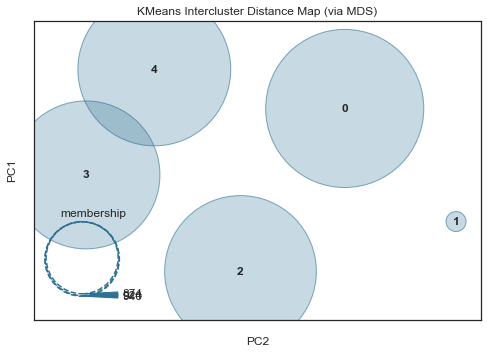

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

# # Instantiate the clustering model and visualizer

model = KMeans(5, random_state = 42)
visualizer = InterclusterDistance(model, random_state = 42)

visualizer.fit(x_new)        # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

In [75]:
y = model.fit_predict(x_train)

In [73]:
y = model.predict(x_train)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [32]:
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.067927,0.156639,-0.234007,0.012331,-0.052468,0.191705,-0.096075,-0.223780,-0.008320,1.318271,...,-0.172211,0.032621,0.195282,0.137479,0.175327,-0.210195,-0.165515,-0.062782,0.255425,0.130909
1,-0.272184,0.114966,-0.027971,-0.152312,-0.301262,0.056219,0.206092,-0.112336,0.212380,2.352400,...,0.021943,0.100452,0.108514,0.107404,0.202352,0.122283,-0.098560,0.013226,0.061522,-0.227862
2,-0.073543,0.006959,-0.254470,-0.158120,-0.097978,0.147733,0.102742,-0.315038,0.045056,2.025146,...,-0.341700,-0.043862,-0.085016,0.055202,0.160419,0.017044,-0.114809,-0.143645,0.060566,0.266621
3,0.137997,0.187236,-0.213740,0.041019,0.136378,0.076126,-0.021509,-0.385177,0.166500,1.703660,...,-0.106261,0.040680,-0.077395,-0.103159,0.207210,-0.260388,-0.221395,-0.038195,0.002629,0.224916
4,-0.076179,0.034250,-0.085417,0.124419,0.211297,-0.131511,0.150662,-0.295047,-0.002381,2.269926,...,-0.212461,0.094510,-0.050821,0.063690,0.240338,0.043936,0.004132,-0.097026,-0.001103,0.036340
5,-0.108862,0.008437,-0.019980,0.013243,-0.290334,0.237130,0.143249,-0.323223,-0.022970,1.629350,...,-0.214535,0.070245,0.050157,0.006474,0.251015,-0.013206,-0.133302,-0.236059,0.108867,0.175580
6,-0.232525,0.312150,-0.393360,-0.118597,-0.009811,-0.090115,0.264720,-0.211725,-0.111046,2.564700,...,-0.146049,0.084335,-0.197015,-0.237225,0.335840,-0.059325,-0.098995,-0.054970,0.379255,0.120368
7,-0.242202,0.127361,-0.285928,0.081715,-0.128216,-0.038762,0.088398,-0.303934,0.030147,1.853127,...,-0.087387,0.240123,-0.066148,-0.118181,0.315807,-0.074250,-0.154673,-0.069061,0.305028,0.056036
8,-0.098407,0.059295,-0.133965,0.010409,-0.185223,-0.096278,-0.091782,-0.331751,0.099290,2.190467,...,-0.181777,0.335285,0.133950,0.027189,0.274902,-0.439125,-0.133473,0.117873,0.126506,-0.010844
9,-0.016416,-0.095302,-0.121185,-0.175204,0.025813,-0.075096,0.267284,-0.082167,-0.008924,0.612604,...,0.277942,-0.072459,-0.054260,-0.007417,0.619757,0.101026,0.193441,-0.242255,-0.091531,-0.099974


In [33]:
x_train.shape


(4169, 300)

In [76]:
y[:30]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
data

,index,dissatisfaction_reason
0,17,couldn't find my gst assessment it logged me ...
1,36,more dissatisfied by the cra and the time tabl...
2,56,"This site is not user friendly at all, special..."
3,58,The option to login on the canada.ca site feel...
4,72,could not access my spouse (my wife account) y...
...,...,...
4164,66143,I could not find the option I was looking for
4165,66173,Terrible site to navigate
4166,66207,found it hard to log on with old passwords etc
4167,66244,Neither of my needs were met; one was not avai...


In [78]:
df = pd.DataFrame({'index':data.index[:100], 'dissatisfaction_reason': data.dissatisfaction_reason[:100] , 'cluster': y[:100]})
df.head()

,index,dissatisfaction_reason,cluster
0,0,couldn't find my gst assessment it logged me ...,0
1,1,more dissatisfied by the cra and the time tabl...,0
2,2,"This site is not user friendly at all, special...",0
3,3,The option to login on the canada.ca site feel...,0
4,4,could not access my spouse (my wife account) y...,0


In [79]:
for i in range(5): #[5,4,8,3,13,0,99,10]:
    print(f'Some examples for topic {i}')
    print('')
    
    samples = df.loc[df['cluster'] == i , ['dissatisfaction_reason']].head(20)
    print(samples['dissatisfaction_reason'].values)
    print(" ****************")

Some examples for topic 0

["couldn't find my gst assessment  it logged me out/timed out during setup/printed a blank page/says only ONE page to be printed, printed 3 pages  2 were BLANK with just URL"
 'more dissatisfied by the cra and the time table for my reassesment of my 2016 taxes'
 'This site is not user friendly at all, specially for people, who are not accustomed to the use of computer.'
 'The option to login on the canada.ca site feels hidden'
 'could not access my spouse (my wife account) yet I am her representative, We are living in Czech republic not easy to reach by the phone (expensive)'
 'Didn’t really get an answer'
 'No explanation as to when I will receive my refund from a reassessment of med exp & no contact # to enquire'
 "I mailed my 2015 tax return 2.5 months ago and I am unable to confirm receipt nor find out it's processing status"
 'my account balance for taxes owing was unavailable'
 'The system was down so I was unable to proceed with the required banking ch

In [52]:
vec = pd.read_csv('topic_vec.csv', header = None)
vec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.082394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.851699
1,0.014285,0.014285,0.014285,0.214299,0.214284,0.014285,0.014285,0.014285,0.214259,0.014285,0.014285,0.014285,0.014285,0.214309
2,0.213657,0.014201,0.014201,0.416527,0.014201,0.014201,0.014201,0.014201,0.014201,0.014201,0.213606,0.014201,0.014201,0.014201
3,0.014274,0.014274,0.014274,0.814441,0.014274,0.014274,0.014274,0.014274,0.014274,0.014274,0.014274,0.014274,0.014274,0.014274
4,0.000000,0.000000,0.000000,0.000000,0.634013,0.258880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,0.017857,0.017857,0.017857,0.267854,0.267856,0.267858,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857
4165,0.017857,0.017857,0.017857,0.517856,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.267857,0.017857,0.017857,0.017857
4166,0.010204,0.010204,0.010204,0.153053,0.010204,0.438777,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.010204,0.295921
4167,0.017850,0.017850,0.017850,0.017850,0.518014,0.267784,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850,0.017850


In [54]:
x_new = pd.concat([x_train , vec], axis =1)

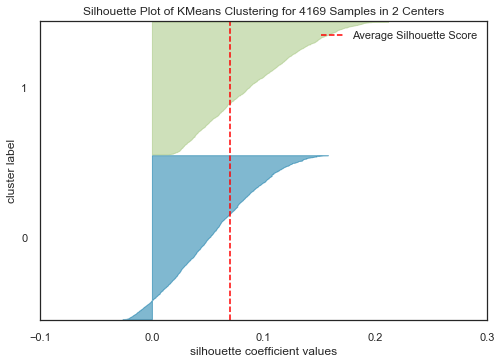

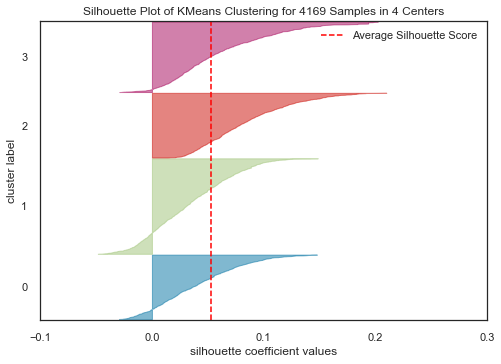

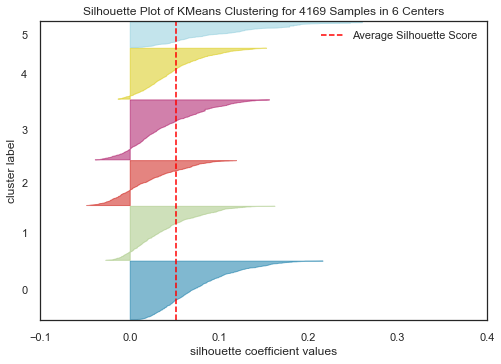

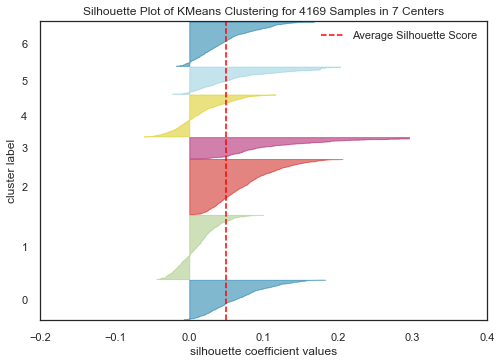

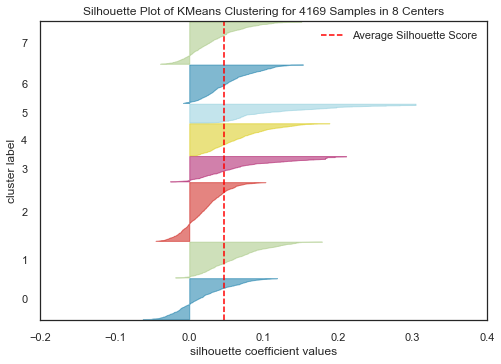

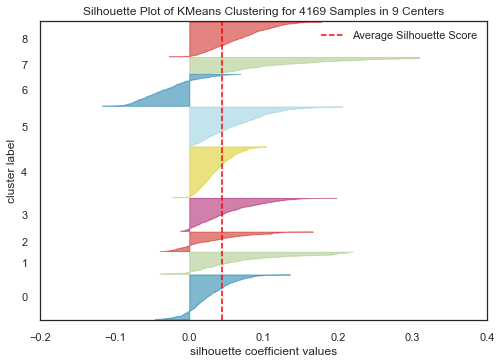

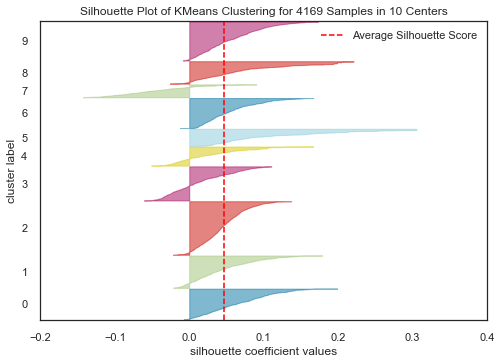

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer
for k in [2,4,6, 7,8, 9, 10]:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(x_new)        # Fit the data to the visualizer
    visualizer.show() 

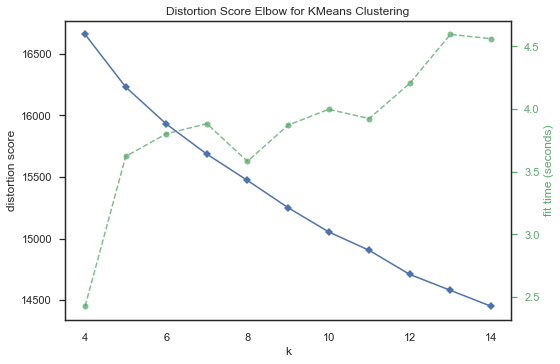

In [56]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(x_new)        # Fit the data to the visualizer
visualizer.show()  

In [57]:
def getInertia2(X,kmeans):
    ''' This function is analogous to getInertia, but with respect to the 2nd closest center, rather than closest one'''
    inertia2 = 0
    for J in range(len(X)):
        L = min(1,len(kmeans.cluster_centers_)-1) # this is just for the case where there is only 1 cluster at all
        dist_to_center = sorted([np.linalg.norm(X[J] - z)**2 for z in kmeans.cluster_centers_])[L]
        inertia2 = inertia2 + dist_to_center
    return inertia2

In [62]:
from sklearn.metrics import silhouette_score
inertias_1 = []
inertias_2 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_new)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
#     inertias_2 = inertias_2 + [getInertia2(x_new,kmeans)]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(x_new, kmeans.labels_)]

In [60]:
x_new.shape

(4169, 314)

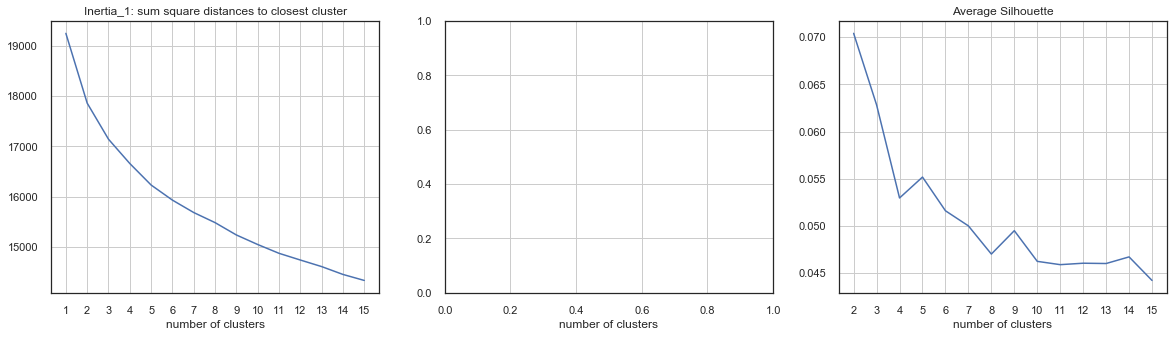

In [63]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,3,2)    
# plt.title("Ratio: Inertia_1 VS. sum square distances to 2nd closest cluster")
# plt.plot(np.arange(1,max_K+1),np.array(inertias_1)/np.array(inertias_2))
# plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()